In [923]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import iqr
import pandas as pd
import random

In [924]:
# Read in data
# data = pd.read_csv('labels_final.txt')
# data = pd.read_csv('labels.txt')
# data = pd.read_csv('labels_temp.txt')
# data = pd.read_csv('labels_skew.txt')
data = pd.read_csv('labels_cropped.txt')
# data = pd.read_csv('labels_round3.txt')

len(data)

91

In [925]:
data = data[data.ClusterSize>=10]


In [926]:
# Remove duplicates
data = data.drop_duplicates(subset=data.columns[1:])
len(data)

84

In [927]:
# X = np.array([data.AvgLength,data.StdAngle]).T

# X = np.array([np.log(1./data.AvgLength),data.StdAngle]).T
X = np.array([data.AvgLength,data.StdAngle]).T

# # X = np.array([data.MedLength,data.Skew]).T
# # X = data.Avglength.as_matrix().reshape(-1,1)
y = data.Label.as_matrix()

In [928]:
# data_real = pd.read_csv('labels_final.txt')
data_real = pd.read_csv('labels_round3.txt')
print len(data_real)

data_real = data_real[data_real.ClusterSize>=10]

# Remove duplicates
data_real = data_real.drop_duplicates(subset=data_real.columns[1:])
print len(data_real)

# X_real = np.array([np.log(1./data_real.AvgLength),data_real.StdAngle]).T
X_real = np.array([data_real.AvgLength,data_real.StdAngle]).T
y_real = data_real.Label.as_matrix()

217
174


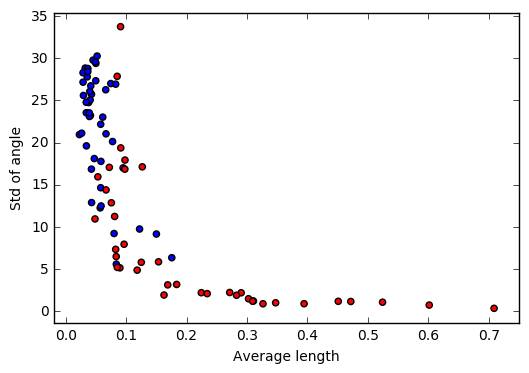

In [929]:
colors = ['r' if label else 'b' for label in y]

plt.scatter(X[:,0],X[:,1],c=colors)
plt.axis('equal')
plt.xlabel('Average length')
plt.ylabel('Std of angle')
# plt.plot([x_dec,x_dec],[np.min(data.Stdangle),np.max(data.Stdangle)])
plt.axis('tight')
plt.show()


In [930]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree


In [931]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))



In [932]:
N = 100
acc = np.array([])
acc_clear = np.array([])
acc_noisy = np.array([])
dec_reg = np.zeros(np.c_[xx.ravel(), yy.ravel()].shape[0])
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3) #,random_state=0)

    # Try decision tree classification
    clf = tree.DecisionTreeClassifier(min_samples_split=2)
    clf.fit(X_train,y_train)

#     clf = RandomForestClassifier(n_estimators=20,min_samples_split=2,random_state=0)
#     clf.fit(X_train,y_train)

#     # Prediction
#     y_pred = clf.predict(X)
#     y_pred_train = clf.predict(X_train)
#     y_pred_test = clf.predict(X_test)

#     # Training and test accuracy
#     train_err = float(sum(y_pred_train==y_train))/len(y_train)
#     test_err = float(sum(y_pred_test==y_test))/len(y_test)
#     acc = np.append(acc,test_err)
    
#     ix_clear = np.where(X_test[:,0]>=0.15)
#     ix_noisy = np.where(X_test[:,0]<0.15)
#     acc_clear = np.append(acc_clear,float(sum(y_pred_test[ix_clear]==y_test[ix_clear]))/len(y_test[ix_clear]))
#     acc_noisy = np.append(acc_noisy,float(sum(y_pred_test[ix_noisy]==y_test[ix_noisy]))/len(y_test[ix_noisy]))
    
    # Predict against real data 
    y_pred_real = clf.predict(X_real)

    # Training and test accuracy
    accuracy = float(sum(y_pred_real==y_real))/len(y_real)
    acc = np.append(acc,accuracy)
    
#     ix_clear = np.where(X_real[:,0]<2.5)
#     ix_noisy = np.where(X_real[:,0]>=2.5)
    
    ix_clear = np.where(X_real[:,0]>=0.15)
    ix_noisy = np.where(X_real[:,0]<0.15)
    
    acc_clear = np.append(acc_clear,float(sum(y_pred_real[ix_clear]==y_real[ix_clear]))/len(y_real[ix_clear]))
    acc_noisy = np.append(acc_noisy,float(sum(y_pred_real[ix_noisy]==y_real[ix_noisy]))/len(y_real[ix_noisy]))
    
    # Decision regions
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    dec_reg = dec_reg + Z

dec_reg = dec_reg.reshape(xx.shape)/N
    
print np.mean(acc)
print np.mean(acc_clear)
print np.mean(acc_noisy)

0.632586206897
0.856
0.595100671141


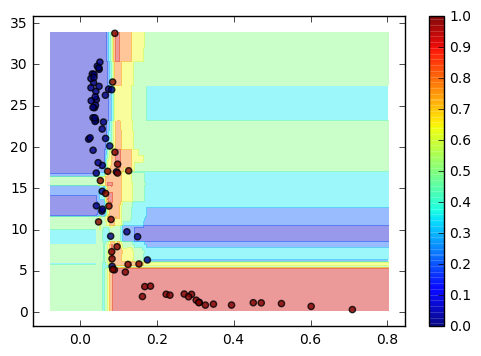

In [933]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plt.figure(figsize=(20,10))
plt.contourf(xx, yy, dec_reg, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.colorbar()
plt.show()

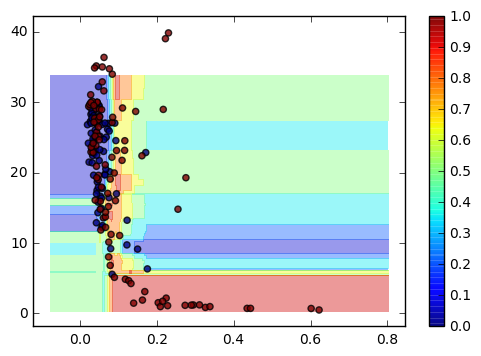

In [934]:
plt.contourf(xx, yy, dec_reg, alpha=0.4)
plt.scatter(X_real[:, 0], X_real[:, 1], c=y_real, alpha=0.8)
plt.colorbar()
plt.show()

In [943]:
# percentage of real images with clear patterns that are detected

# ix_clear = np.where(X_real[:,0]<2.5)
ix_clear = np.where(X_real[:,0]>=0.15)
np.mean(acc_clear)*float(len(ix_clear[0]))/len(X_real)

0.12298850574712646

In [ ]:
# Prediction: areas with p(1) > 0.5
# given a new image --> predict it's probablity based on classifier --> detect lines is p > 0.5

In [936]:
# data = pd.read_csv('labels_final.txt')

# data = data[data.ClusterSize>=10]
# # Remove duplicates
# data = data.drop_duplicates(subset=data.columns[1:])
# len(data)

# X_real = np.array([np.log(1./data.AvgLength),data.StdAngle]).T
# y_real = data.Label.as_matrix()

In [937]:
# colors = ['g' if label else 'r' for label in y_real]

# plt.contourf(xx, yy, Z, alpha=0.4)
# plt.scatter(X_real[:,0],X_real[:,1],c=colors)
# plt.axis('equal')
# plt.xlabel('Average length')
# plt.ylabel('Std of angle')
# # plt.plot([x_dec,x_dec],[np.min(data.Stdangle),np.max(data.Stdangle)])
# plt.axis('tight')
# plt.show()


In [938]:
# # Prediction against real images

# y_pred_real = clf.predict(X_real)

In [939]:
# print float(sum(y_pred_real==y_real))/len(y_real)


In [940]:
# # ix_clear = np.where(data.StdAngle<6)
# ix_clear = np.where(np.log(1./data.AvgLength)<2.5)
# ix_noisy = np.where(np.log(1./data.AvgLength)>=2.5)

In [941]:
# print float(sum(y_pred_real[ix_clear]==y_real[ix_clear]))/len(y_real[ix_clear])
# print float(sum(y_pred_real[ix_noisy]==y_real[ix_noisy]))/len(y_real[ix_noisy])